In [1]:
# Restaurant Sales Data Analysis
# Author: SASAPU SAI SANTOSH
# Objective: Derive actionable insights from restaurant sales to boost revenue and optimize operations.

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
data = pd.read_csv(r"C:\Sales_Data_Analysis\Data\Sales_Data_Analysis.csv") 

In [4]:
# Data Overview

In [5]:
# Display first 5 rows
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [6]:
# Check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [7]:
# Check missing values
data.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

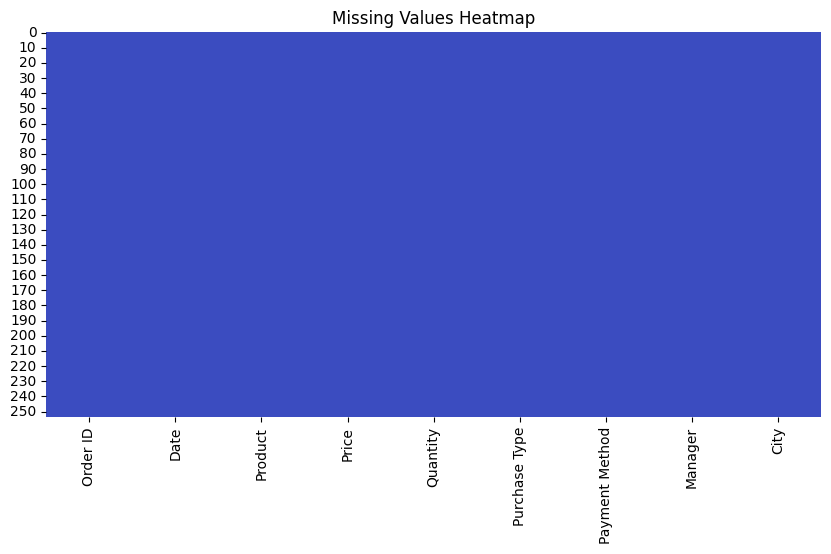

In [8]:
# Visualize missing data
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
#Calculate Total Sales in the Restaurant?

In [10]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [11]:
# Add 'Total Sales' column (Price * Quantity)
data['Total Sales'] = data['Price'] * data['Quantity']

In [12]:
# Step 9: Verify new column
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920
2,10454,2022-07-11,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960
3,10455,2022-08-11,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495


In [13]:
print("Total Revenue: ", data['Total Sales'].sum())

Total Revenue:  769515.8592000001


In [14]:
print("Total Orders: ", data['Order ID'].nunique())

Total Orders:  254


In [15]:
# Drop duplicates in the data if it was there
data.drop_duplicates(inplace=True)

In [16]:
data.columns               #To get the column names

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City', 'Total Sales'],
      dtype='object')

In [17]:
data.Manager              #To get about managers from the data

0        Tom      Jackson
1             Pablo Perez
2           Joao    Silva
3           Walter Muller
4           Walter Muller
              ...        
249         Walter Muller
250         Walter Muller
251         Walter Muller
252         Walter Muller
253         Walter Muller
Name: Manager, Length: 254, dtype: object

In [18]:
data.Manager.unique()                     # To show all the unique values of the column

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [19]:
data.Manager.nunique()                      # To show count of unique values present in the column

14

In [20]:
data['Manager'] = data['Manager'].str.strip().str.replace(r'\s+', ' ', regex=True)   # To remove extra spaces in names

In [21]:
data.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920
2,10454,2022-07-11,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960
3,10455,2022-08-11,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495
5,10457,2022-08-11,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris,2000.0143
6,10459,2022-08-11,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin,999.9960
7,10460,2022-09-11,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris,7199.9673
8,10461,2022-09-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris,2000.0495
9,10462,2022-09-11,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris,2000.0143


In [22]:
data['Manager'].unique()             # To show all the unique values of the column

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [23]:
data['Manager'].nunique()             # To show count of unique values present in the column

5

In [24]:
#To remove duplicate records

In [25]:
data.head()                     # to show top 5 records of the dataframe

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920
2,10454,2022-07-11,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960
3,10455,2022-08-11,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495


In [26]:
# Summary statistics
data.describe()

,Order ID,Date,Price,Quantity,Total Sales
count,254.000000,83,254.000000,254.000000,254.000000
mean,10584.133858,2022-07-30 18:47:42.650602496,7.102323,460.611457,3029.589997
min,10452.000000,2022-01-12 00:00:00,2.950000,200.400000,999.996000
25%,10520.250000,2022-05-12 00:00:00,3.490000,201.010000,2000.011500
50%,10583.500000,2022-08-12 00:00:00,4.990000,538.880000,2100.020400
75%,10649.750000,2022-10-12 00:00:00,9.950000,677.440000,2400.003200
max,10713.000000,2022-12-12 00:00:00,29.050000,754.430000,16074.435000
std,75.889181,NaN,4.341855,214.888699,2420.118378


In [27]:
data[data.duplicated()]                      # To show all the duplicate records

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales


In [28]:
data[data['Order ID'].duplicated()]        # to check the duplicate records in a column

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales


In [29]:
data[data['Order ID'] == 10483]            # using filtering to show some records

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales
60,10483,NaT,Beverages,2.95,677.97,In-store,Credit Card,Joao Silva,Lisbon,2000.0115


In [30]:
### Q1️. What is the most preferred Payment Method?

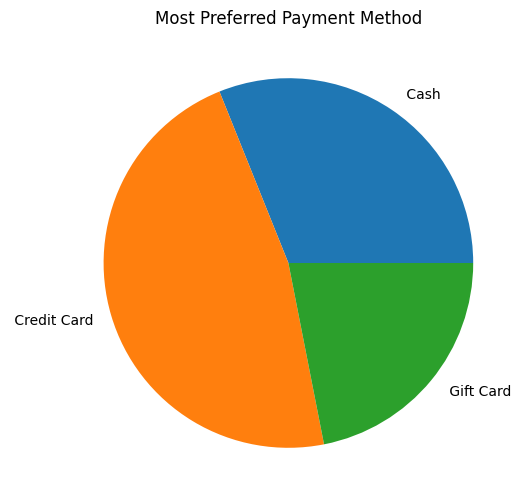

In [31]:
payment_sales = data.groupby('Payment Method')['Total Sales'].sum()
payment_sales.plot(kind='pie', figsize=(6,6))
plt.title("Most Preferred Payment Method")
plt.ylabel("")
plt.show()

In [32]:
### Q2. Which Product Sells the Most?
# By Quantity Sold & By Revenue Generated

In [33]:
# By Quantity
data.groupby('Product')['Quantity'].sum()               # To make the group of unique values of a column

Product
Beverages             34983.14
Burgers               29022.31
Chicken Sandwiches    11135.92
Fries                 32034.34
Sides & Other          9819.60
Name: Quantity, dtype: float64

In [34]:
data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)       # To sort the result

Product
Beverages             34983.14
Fries                 32034.34
Burgers               29022.31
Chicken Sandwiches    11135.92
Sides & Other          9819.60
Name: Quantity, dtype: float64

In [35]:
most_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
most_quantity

Product
Beverages             34983.14
Fries                 32034.34
Burgers               29022.31
Chicken Sandwiches    11135.92
Sides & Other          9819.60
Name: Quantity, dtype: float64

In [36]:
type(most_quantity)                   # to the type of the variable

pandas.core.series.Series

In [37]:
most_quantity = most_quantity.reset_index()     # To convert the index of a Series into a column to form a DataFrame
most_quantity

,Product,Quantity
0,Beverages,34983.14
1,Fries,32034.34
2,Burgers,29022.31
3,Chicken Sandwiches,11135.92
4,Sides & Other,9819.60


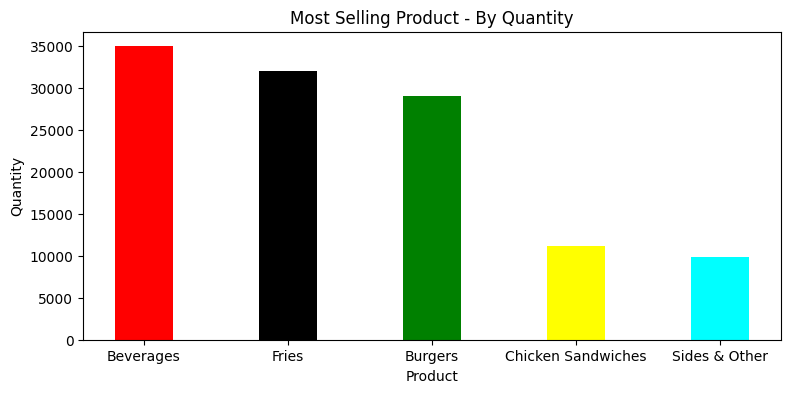

In [38]:
plt.figure(figsize = (9,4))
plt.bar(most_quantity['Product'], most_quantity['Quantity'], color = ['red', 'black', 'green', 'yellow', 'cyan'], width=0.4)
plt.title("Most Selling Product - By Quantity")              
plt.xlabel("Product")
plt.ylabel("Quantity");

In [39]:
#### By Revenue

In [40]:
data['Revenue'] = data['Price'] * data['Quantity']       # to create a new column 'Revenue'

In [41]:
data.head()                    #To check the Revenue

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143,2000.0143
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920,2199.9920
2,10454,2022-07-11,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960,999.9960
3,10455,2022-08-11,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133,7400.0133
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495,2000.0495


In [42]:
data.groupby('Product')['Revenue'].sum().sort_values(ascending = False)    # to make the group of unique values of a column

Product
Burgers               376999.8069
Fries                 125674.2903
Chicken Sandwiches    114641.6950
Beverages             103200.2630
Sides & Other          48999.8040
Name: Revenue, dtype: float64

In [43]:
most_revenue = data.groupby('Product')['Revenue'].sum().sort_values(ascending = False)
most_revenue

Product
Burgers               376999.8069
Fries                 125674.2903
Chicken Sandwiches    114641.6950
Beverages             103200.2630
Sides & Other          48999.8040
Name: Revenue, dtype: float64

In [44]:
most_revenue = most_revenue.reset_index()         # To convert the index of a Series into a column to form a DataFrame
most_revenue

,Product,Revenue
0,Burgers,376999.8069
1,Fries,125674.2903
2,Chicken Sandwiches,114641.6950
3,Beverages,103200.2630
4,Sides & Other,48999.8040


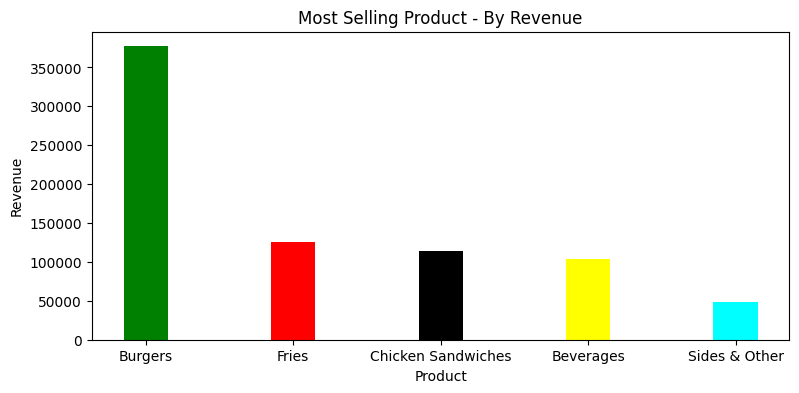

In [45]:
plt.figure(figsize=(9, 4))
plt.bar(most_revenue['Product'], most_revenue['Revenue'], color = ['green', 'red', 'black', 'yellow', 'cyan'], width = 0.3);
plt.title("Most Selling Product - By Revenue")       # setting the title       
plt.xlabel("Product")                                # setting the x-axis label
plt.ylabel("Revenue");                               # setting the y-axis label

In [46]:
### Q3. Which Manager or City Generated the Maximum Revenue?

In [47]:
data.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143,2000.0143
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920,2199.9920


In [48]:
data.City.unique()                       # To check the unique values of the column 'City'

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [49]:
data.City.nunique()                      # To check the count of unique values of the column 'City'

5

In [50]:
data.groupby('City')['Revenue'].sum().sort_values(ascending=False)       # using groupby on 'City' & 'Revenue' column

City
Lisbon    241714.1157
London    211201.0406
Madrid    136200.2665
Berlin    100600.1313
Paris      79800.3051
Name: Revenue, dtype: float64

In [51]:
data.Manager.nunique()                   # To check the count of unique values of the column 'Manager'

5

In [52]:
data.Manager.unique()                   # To check the unique values of the column 'Manager'

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [53]:
data.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)   # Using groupby on 'Manager' & 'Revenue' column

Manager
Joao Silva       241714.1157
Tom Jackson      211201.0406
Pablo Perez      136200.2665
Walter Muller    100600.1313
Remy Monet        79800.3051
Name: Revenue, dtype: float64

In [54]:
### Q4️. How Does Revenue Change Over Time?

In [55]:
data.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143,2000.0143
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920,2199.9920


In [56]:
data.Date.dtype

dtype('<M8[ns]')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            83 non-null     datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Total Sales     254 non-null    float64       
 10  Revenue         254 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 22.0+ KB


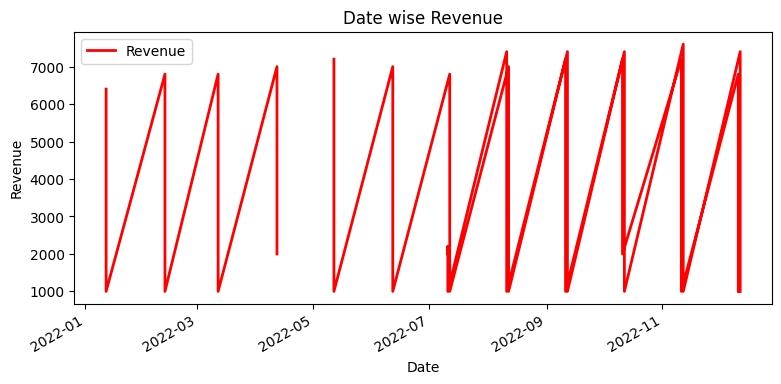

In [58]:
data.plot('Date', 'Revenue', color='red', linewidth=2, figsize=(9,4)) 
plt.title("Date wise Revenue")                        # setting the title
plt.xlabel("Date")                                    # setting the x-axis label
plt.ylabel("Revenue")                                 # setting the y-axis label
plt.show()

In [59]:
### Q5️. What is the Overall Average Revenue?

In [60]:
data['Revenue'].mean()

np.float64(3029.589996850394)

In [61]:
### Q6. What is the Average Revenue for November & December?

In [62]:
data['Month'] = data['Date'].dt.month              # creating a new column showing Month only

In [63]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143,2000.0143,7.0
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920,2199.9920,7.0
2,10454,2022-07-11,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960,999.9960,7.0
3,10455,2022-08-11,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133,7400.0133,8.0
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495,2000.0495,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
249,10709,NaT,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin,999.9960,999.9960,NaN
250,10710,NaT,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin,9800.0457,9800.0457,NaN
251,10711,NaT,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin,2800.0295,2800.0295,NaN
252,10712,NaT,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin,2199.9913,2199.9913,NaN


In [64]:
m11 = data[data['Month'] == 11]          # filtering the records with month '11'
m11

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue,Month
16,10470,2022-11-11,Burgers,12.99,554.27,In-store,Credit Card,Pablo Perez,Madrid,7199.9673,7199.9673,11.0
17,10471,2022-11-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Pablo Perez,Madrid,2000.0495,2000.0495,11.0
18,10472,2022-11-11,Fries,3.49,630.37,In-store,Credit Card,Pablo Perez,Madrid,2199.9913,2199.9913,11.0
19,10473,2022-11-11,Beverages,2.95,677.97,In-store,Credit Card,Pablo Perez,Madrid,2000.0115,2000.0115,11.0
20,10474,2022-11-11,Sides & Other,4.99,200.40,In-store,Credit Card,Pablo Perez,Madrid,999.9960,999.9960,11.0
160,10620,2022-11-12,Burgers,12.99,585.07,Online,Gift Card,Tom Jackson,London,7600.0593,7600.0593,11.0
161,10621,2022-11-12,Chicken Sandwiches,9.95,201.01,Online,Gift Card,Tom Jackson,London,2000.0495,2000.0495,11.0
162,10622,2022-11-12,Fries,3.49,630.37,Online,Gift Card,Tom Jackson,London,2199.9913,2199.9913,11.0
163,10623,2022-11-12,Beverages,2.95,745.76,Online,Gift Card,Tom Jackson,London,2199.9920,2199.9920,11.0
164,10624,2022-11-12,Sides & Other,4.99,200.40,Online,Gift Card,Tom Jackson,London,999.9960,999.9960,11.0


In [65]:
m11.Revenue.mean()                           # to show the mean revenue

np.float64(2940.01037)

In [66]:
m12 = data[data.Month == 12]                  # filtering the records with month '12'
m12

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue,Month
21,10475,2022-12-11,Burgers,12.99,523.48,In-store,Credit Card,Pablo Perez,Madrid,6800.0052,6800.0052,12.0
22,10476,2022-12-11,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Pablo Perez,Madrid,2000.0495,2000.0495,12.0
23,10477,2022-12-11,Fries,3.49,630.37,In-store,Credit Card,Pablo Perez,Madrid,2199.9913,2199.9913,12.0
24,10478,2022-12-11,Beverages,2.95,677.97,In-store,Credit Card,Pablo Perez,Madrid,2000.0115,2000.0115,12.0
25,10479,2022-12-11,Sides & Other,4.99,200.40,In-store,Credit Card,Pablo Perez,Madrid,999.9960,999.9960,12.0
165,10625,2022-12-12,Burgers,12.99,569.67,Online,Gift Card,Tom Jackson,London,7400.0133,7400.0133,12.0
166,10626,2022-12-12,Chicken Sandwiches,9.95,201.01,Online,Gift Card,Tom Jackson,London,2000.0495,2000.0495,12.0
167,10627,2022-12-12,Fries,3.49,630.37,Online,Gift Card,Tom Jackson,London,2199.9913,2199.9913,12.0
168,10628,2022-12-12,Beverages,2.95,677.97,Online,Gift Card,Joao Silva,Lisbon,2000.0115,2000.0115,12.0
169,10629,2022-12-12,Sides & Other,4.99,200.40,Online,Gift Card,Joao Silva,Lisbon,999.9960,999.9960,12.0


In [67]:
m12.Revenue.mean()                                  # to show the mean revenue

np.float64(2860.0115100000003)

In [68]:
### Q7. What is the Standard Deviation of Revenue and Quantity?

In [69]:
data['Quantity'].std()

np.float64(214.88869921528874)

In [70]:
data['Revenue'].std()

np.float64(2420.11837804107)

In [71]:
### Q8. What is the Variance of Revenue and Quantity?

In [72]:
data['Quantity'].var()

np.float64(46177.153050438836)

In [73]:
data['Revenue'].var()

np.float64(5856972.963732139)

In [74]:
### Q9. What are the Average Quantity Sold and Average Revenue per Product?

In [75]:
data.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total Sales,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143,2000.0143,7.0
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920,2199.9920,7.0


In [76]:
data.groupby('Product')[['Quantity', 'Total Sales']].mean().sort_values(by='Total Sales', ascending=False)

,Quantity,Total Sales
Product,,
Burgers,558.121346,7249.996287
Fries,628.124314,2464.201771
Chicken Sandwiches,214.152308,2204.647981
Beverages,699.662800,2064.005260
Sides & Other,200.400000,999.996000


In [77]:
"""
Key Insights:

- The majority of customers prefer paying via Credit Card.
- Beverages sell the most in quantity, while burgers bring in the highest revenue.
- Manager 'Joao Silva' has achieved the highest Sales.
- Lisbon is the city with the highest revenue.
- Revenue shows an 'increasing trend' over time.
- November and December have 'higher average revenues', indicating festive season sales peaks.
- Products like Burger and Pizza have high average quantities sold and revenue.

"""
    

"\nKey Insights:\n\n- The majority of customers prefer paying via Credit Card.\n- Beverages sell the most in quantity, while burgers bring in the highest revenue.\n- Manager 'Joao Silva' has achieved the highest Sales.\n- Lisbon is the city with the highest revenue.\n- Revenue shows an 'increasing trend' over time.\n- November and December have 'higher average revenues', indicating festive season sales peaks.\n- Products like Burger and Pizza have high average quantities sold and revenue.\n\n"